In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta, gamma, poisson
from scipy.optimize import minimize
from numpy.random import default_rng
import matplotlib.pyplot as plt

Note:  To match gamma parameterization i book,  use gamma(s, scale = 1/r)

### Exercise 5.5:

Let random variable $\lambda$ represent the rate of text messages people receive in an hour. At first, you believe that the typical number of messages per hour is 5 with a standard deviation of 0.25 messages.
Tune and plot an appropriate Gamma  prior model for  $\lambda$.
 
What is the prior probability that the rate of text messages per hour is larger than 10? 

Recall mean = s/r,  var = s/r^2 .   
so $s/r = 5$ and $s/r^2 = 0.25^2$

Lets solve this general:

$s = \mu r$
$\mu / r = \sigma^2$

implies 

$r = \mu/\sigma^2$ and $s = \mu^2/\sigma^2$

In [13]:
.25**2

0.0625

s = 400.0, r = 80.0
(array(5.), array(0.0625))
Probability of rate > 10 is 0.0


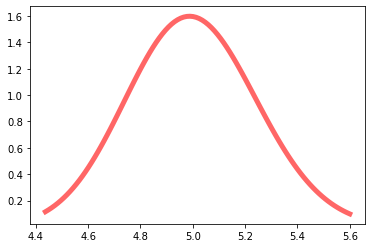

In [20]:
fig, ax = plt.subplots(1, 1)
r = 5.0/0.25**2
s = 5.0*r 
print(f"s = {s}, r = {r}")
rv = gamma(s, scale = 1/r)
print(rv.stats(moments="mv"))
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print(f"Probability of rate > 10 is {1.0-rv.cdf(10.0)}")

### Exercise 5.6 
Continuing with Exercise 5.5, you collect data from six friends. They received 7, 3, 8, 9, 10, 12 text messages in the previous hour.
Plot the resulting likelihood function 

Plot the   posterior pdf  and summary statistics.
 
Comment on how your understanding about   $\lambda$ changed from the prior (in the previous exercise) to the posterior based on the data you collected from your friends.

In [22]:
totalMessages = 7+3+8+9+10+12
numTest = 6

In [27]:
np.exp(4.*numTest)

26489122129.84347

recall that the likely hood is $L \propto \lambda^{\sum{y_i}}e^{-n\lambda}$


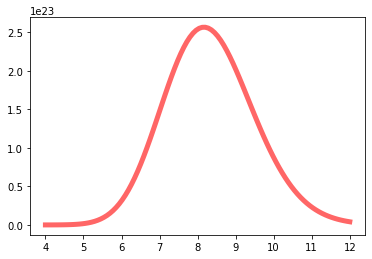

In [29]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(4., 12., 100)
ax.plot(x, np.exp(-numTest*x)*x**totalMessages,
       'r-', lw=5, alpha=0.6, label='Likelhood')
 

And the posterior is given by:

In [31]:
post_s = s + totalMessages
post_r = r + numTest

Mean: 5.220930232558139, std: 0.24639093140019871
Probability of rate > 10 is now 0.0


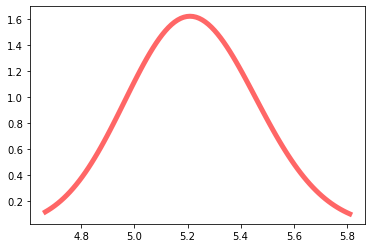

In [35]:
fig, ax = plt.subplots(1, 1)
rv = gamma(post_s, scale = 1/post_r)
(mean, var) = rv.stats(moments="mv")
print(f"Mean: {mean}, std: {np.sqrt(var)}")
x = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
ax.plot(x, rv.pdf(x),
       'r-', lw=5, alpha=0.6, label='gamma pdf')
print(f"Probability of rate > 10 is now {1.0-rv.cdf(10.0)}")

Note that the very tight prior ($\sigma = 0.25$) really means the data was not anywhere near enough! Almost no change from prior.

### Exercise 5.9 (Investing in stock)

You just bought stock in FancyTech. Let random variable  μ  be the average dollar amount that your FancyTech stock goes up or down in a one-day period. At first, you believe that  μ  is 7.2 dollars with a standard deviation of 2.6 dollars. Tune and plot an appropriate Normal prior model for  μ.

According to your plot, does it seem plausible that the FancyTech stock would increase by an average of 7.6 dollars in a day?

Does it seem plausible that the FancyTech stock would increase by an average of 4 dollars in a day?

What is the prior probability that, on average, the stock price goes down? Hint: pnorm().

What is the prior probability that, on average, your stock price goes up by more than 8 dollars per day?

### Exercise 5.10 (Investing in stock with data) 

Continuing with Exercise 5.9, it’s reasonable to assume that the daily changes in FancyTech stock value are Normally distributed around an unknown mean of  μ with a known standard deviation of  $\sigma = 2$ dollars.

On a random sample of 4 days, you observe changes in stock value of -0.7, 1.2, 4.5, and -4 dollars.

Plot the corresponding likelihood function of  μ
 
Plot the prior pdf, likelihood function, and the posterior pdf for  μ

Use summarize_normal_normal() to calculate descriptive statistics for the prior and the posterior models.

Comment on how your understanding about  μ evolved from the prior (in the previous exercise) to the posterior based on the observed data.

What is the posterior probability that, on average, the stock price goes down? Hint: pnorm().

What is the posterior probability that, on average, your stock price goes up by more than 8 dollars per day?

### Exercise 5.14 
 To show that posterior simulation sucks, attempt Simulate the posterior of  μ
  for the following model upon observing a single data point  Y = 1.1:
 
 $$ Y|\mu \sim N(\mu, 1^2)\\
    \mu \sim N(0, 1^2) $$
    
 Note that we will rarely see exactly Y =1.1, but what if we gave it a windo dY = .01 for example. Lets try that